In [120]:
#! /usr/bin/env python3 
# -*- coding: utf-8 -*-

"""
Course :
GTI770 — Systèmes intelligents et apprentissage machine
Project :
Lab # 2 — Arbre de décision, Bayes Naïf et KNN
Students :
Alexendre Bleau — BLEA14058906
David Létinaud  — LETD05129708
Thomas Lioret   — LIOT20069605
Group :
GTI770-A19-01
Dl pycharm sur linux
"""
from skimage import io
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier# Import Decision Tree Classifie
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set
import sklearn.metrics as metrics
#from sklearn.metric import accuracy_score, f1_score
import csv
import matplotlib.pyplot as plt

from color import center_color,crop_center
from fourier_transform import fourier_transform
from binaryPattern import binaryPatterns
#import match 
import operator
import numpy as np 
import random
import math
import pandas as pd

########################################   Initialisations   ########################################

#image_path = "C:/Users/David/Desktop/GTI770/data/data/images/"
#image_path = '/Users/thomas/Desktop/COURS_ETS/gti770/data/images/'
#dataset_path = "C:/Users/David/Desktop/GTI770/data/data/csv/galaxy/galaxy_label_data_set.csv"
#dataset_path = '/Users/thomas/Desktop/COURS_ETS/gti770/data/csv/galaxy/galaxy_label_data_set.csv'
dataset_path = "/home/alex/Desktop/GTI770-tp2/csv/galaxy/galaxy_feature_vectors.csv"
image_path = "/home/alex/Desktop/GTI770-tp2/csv/images/"
# separt la matrice de date en 2 matrice
#on doit avoir au moin 2 matrice vide créer avant l'appel de la méthode

#def SplitData(Originaldata,ratio,XTrain=[], Xtest=[]):
 #   for x in range(Originaldata):
  #      if random.random()< ratio:
   #         XTrain.append(x)
    #    else:
     #       Xtest.append(x)
# Nombre d'images total du dataset (training + testing)
nb_img = 100

# Pourcentage de données utilisées pour l'entrainement 
ratio_train = 0.7


X=[]
Y=[]

########################################   Lecture   ########################################                                                                                        
# Lecture du fichier CSV                                                                                                                                                             
with open(dataset_path, 'r') as f:
    features_list = list(csv.reader(f, delimiter=','))


    # Lecture ligne par ligne                                                                                                                                                        
    for c in range(nb_img):
        features = [float(i) for i in features_list[0][1:75]]
        galaxy_class = int(float(features_list[0][75]))
        features_list.pop(0)
        #print(type(features),type(galaxy_class))                                                                                                                                    

        X.append(features)
        Y.append(galaxy_class)


############## FIN LECTURE #########################    
        
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=ratio_train, random_state=1) # 70% training and 30% test




def accknn(matrice):
    deno = matrice[0][0]+matrice[1][1]
    nume = matrice[0][0]+matrice[0][1]+matrice[1][0]+matrice[1][1]
    acc=(float(deno)/float(nume))
    return acc*100
accknn(matrice)

def KNN(X_train,X_test,Y_train,Y_test,k):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train,Y_train)
    y_pred =knn.predict(X_test)
    confusion_matrix(Y_test,y_pred)
    matrice = confusion_matrix(Y_test,y_pred)
  
    acc = accknn(matrice)
    vallAcc.append(acc)

    score_ = metrics.f1_score(Y_test, y_pred, labels=None, pos_label=1, average="weighted", sample_weight=None)*100.0

    f1score.append(score_)

---------------k---------------
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
----------------acc-----------
[53.333333333333336, 60.0, 53.333333333333336, 53.333333333333336, 43.333333333333336, 36.666666666666664, 46.666666666666664, 50.0, 46.666666666666664, 53.333333333333336, 53.333333333333336, 60.0, 56.666666666666664, 60.0, 60.0, 63.33333333333333, 60.0, 63.33333333333333, 63.33333333333333, 63.33333333333333, 60.0, 63.33333333333333, 60.0, 53.333333333333336, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 50.0, 50.0, 53.333333333333336, 53.333333333333336, 53.333333

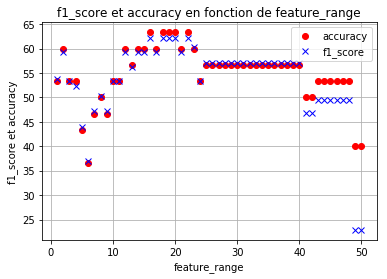

In [121]:
valk=[]
vallAcc=[]
f1score=[]
for x in range (1,51):
    valk.append(x)
    KNN(X_train,X_test,Y_train,Y_test,x)
print("---------------k---------------")
print(valk)
print("----------------acc-----------")
print(vallAcc)
print("-----------score--------------")
print(f1score)


fig, ax2 = plt.subplots()
ax2.plot(valk,vallAcc,"or",label = "accuracy")
ax2.plot(valk,f1score,"xb",label = "f1_score")
ax2.set(xlabel='feature_range', ylabel='f1_score et accuracy',title='f1_score et accuracy en fonction de feature_range')
ax2.grid()
plt.legend()
plt.show()